In [158]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [159]:
env = BlackjackEnv()

In [163]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    for i in range(num_episodes):
        
        G = 0
        states = []
        r = []
        s0 = env.reset()
        while True:
            sn,rn, done, _ = env.step(policy(s0))
            states.append(s0)
            r.append(rn)
            s0 = sn
            if (done):
                break
        for j in range(len(states)-1,-1,-1):
            s0 = states[j]
            rn = r[j]
            G = discount_factor*G + rn
            if not(s0 in states[0:j]):
                returns_sum[s0] += G
                returns_count[s0] += 1
           
            
    
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    
    
    # The final value function
    V = defaultdict(float)
    for s in returns_sum:
        V[s] = returns_sum[s]/returns_count[s]
    # Implement this!

    return V    

In [164]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

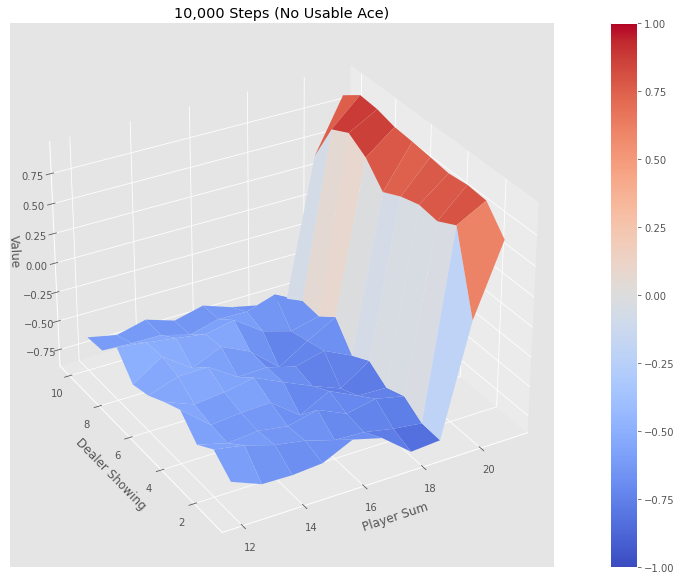

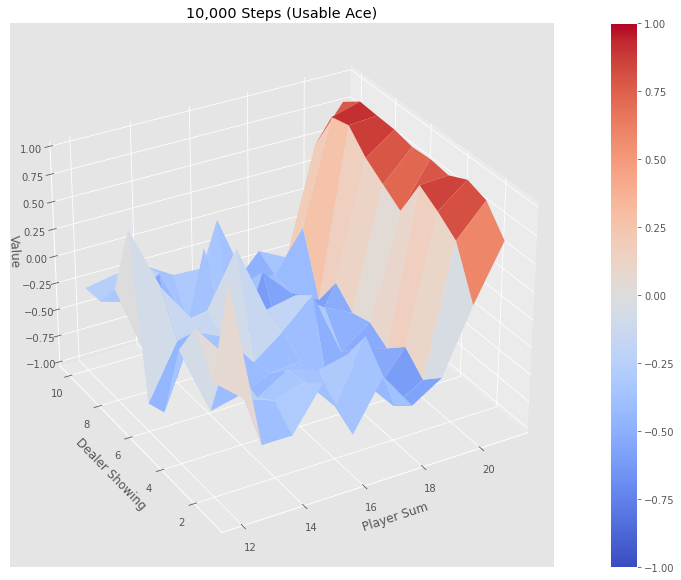

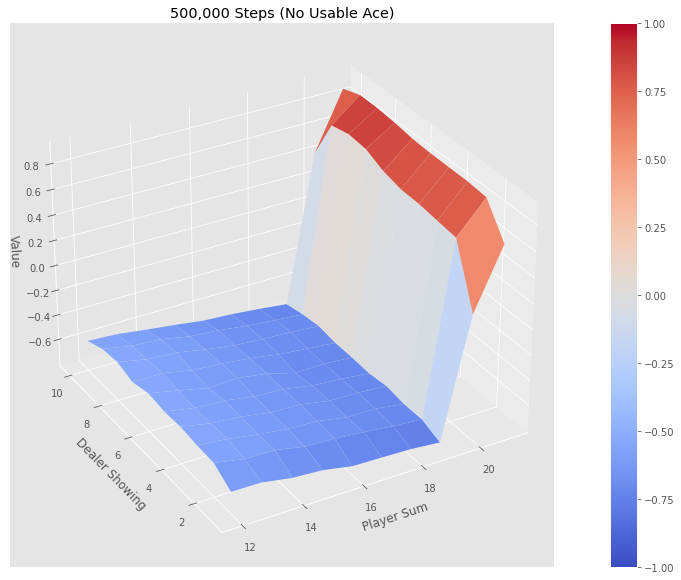

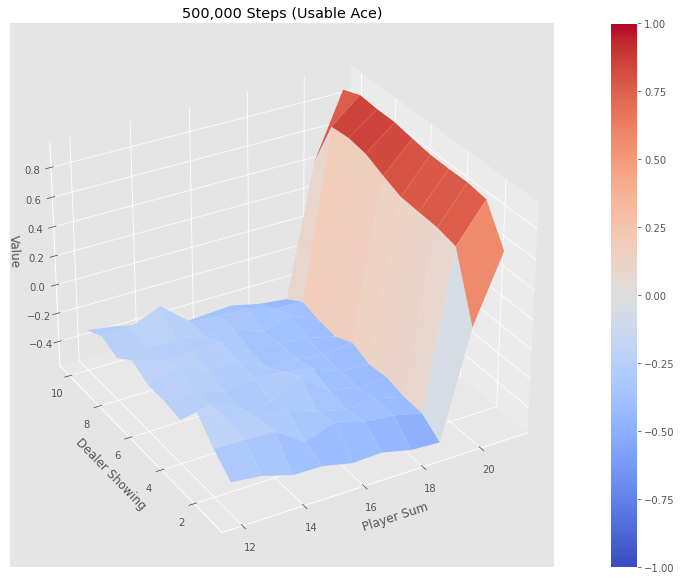

In [165]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")